<a href="https://colab.research.google.com/github/JoaoPSPacolla/Analise-Vendas_Pandas-Mathplotib/blob/main/Exerc%C3%ADcio_3_Base_de_Vendas_Python_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trazendo dados




In [2]:
import pandas as pd

In [4]:
df = pd.read_excel('Dados.xlsx')

# Tratando

Verificando dados nulos

In [36]:
df.isnull().sum()

,0
id_venda,0
data_venda,0
cliente,0
produto,10
categoria,10
quantidade,3
preco_unitario,10
total_venda,11
cidade,0
estado,3


In [10]:
df.shape[0] #total de linhas

1100

Verificando dados duplicados

In [37]:
df.duplicated().sum()

#Não tem nenhuma linha duplicada

np.int64(0)

Limpando linhas onde produto e quantidade forem nulo

In [38]:
df_limpo = df.dropna(subset=["produto"])

In [39]:
df_limpo.isnull().sum()

,0
id_venda,0
data_venda,0
cliente,0
produto,0
categoria,0
quantidade,2
preco_unitario,0
total_venda,1
cidade,0
estado,2


In [40]:
df_limpo = df_limpo.dropna(subset=["quantidade"])

In [41]:
df_limpo.isnull().sum()

,0
id_venda,0
data_venda,0
cliente,0
produto,0
categoria,0
quantidade,0
preco_unitario,0
total_venda,1
cidade,0
estado,2


Ajustando Valor total

In [42]:
print(df_limpo.dtypes)


id_venda            int64
data_venda         object
cliente            object
produto            object
categoria          object
quantidade        float64
preco_unitario     object
total_venda        object
cidade             object
estado             object
dtype: object


In [44]:
df_limpo['total_venda'] = pd.to_numeric(df_limpo['total_venda'], errors='coerce')

In [45]:
print(df_limpo['total_venda'].isna().sum())

203


In [46]:
df_limpo.isnull().sum()

,0
id_venda,0
data_venda,0
cliente,0
produto,0
categoria,0
quantidade,0
preco_unitario,0
total_venda,203
cidade,0
estado,2


In [47]:
df_limpo['preco_unitario'] = pd.to_numeric(df_limpo['preco_unitario'], errors='coerce')


In [48]:
print("Linhas com preco_unitario inválido:", df_limpo['preco_unitario'].isna().sum())


Linhas com preco_unitario inválido: 240


In [49]:
erros_preco = df_limpo[df_limpo['preco_unitario'].isna()]
print(erros_preco[['produto', 'preco_unitario']].head(10))

       produto  preco_unitario
5     Notebook             NaN
11    Notebook             NaN
12  Smartphone             NaN
22  Smartphone             NaN
31    Notebook             NaN
32  Smartphone             NaN
39    Notebook             NaN
47  Smartphone             NaN
48  Smartphone             NaN
56  Smartphone             NaN


É possível obserar que apareceram linhas vazias que antes não estavam. Isso aconteceu porque os dados estavam com tipos diferentes e o python não conseguiu transformá-los para numero

Removendo linhas com preço unitário/total inválido

In [52]:
df_limpo = df_limpo.dropna(subset=['preco_unitario', 'total_venda'])

In [53]:
df_limpo.isnull().sum()

,0
id_venda,0
data_venda,0
cliente,0
produto,0
categoria,0
quantidade,0
preco_unitario,0
total_venda,0
cidade,0
estado,2


# Encontrando produto mais vendido

In [54]:
quantidade_vendida_por_produto = df_limpo.groupby('produto')["quantidade"].sum() #Retorna uma Series

print(quantidade_vendida_por_produto)

produto
Bolsa de Couro     315.0
Cadeira Gamer       63.0
Calça Jeans        348.0
Camiseta Básica    286.0
Fone Bluetooth     367.0
Mouse sem fio      253.0
Relógio Digital    343.0
Tênis Esportivo    318.0
Name: quantidade, dtype: float64


In [55]:
idMaisVendido = quantidade_vendida_por_produto.idxmax()

maisVendido = quantidade_vendida_por_produto.loc[idMaisVendido]

print(f"Produto mais vendido: {idMaisVendido}")
print(f"Quantidade: {maisVendido}")

Produto mais vendido: Fone Bluetooth
Quantidade: 367.0


# Cliente que mais comprou

In [24]:
soma_por_cliente = df_limpo.groupby('cliente')["quantidade"].sum()

print(soma_por_cliente)

cliente
12132234.45        2.0
Agatha Caldeira    4.0
Agatha Cardoso     3.0
Agatha Melo        2.0
Agatha Vieira      3.0
                  ... 
Yasmin da Rocha    4.0
Yuri Castro        3.0
Yuri Cavalcanti    4.0
Yuri Gonçalves     3.0
Yuri da Paz        5.0
Name: quantidade, Length: 1058, dtype: float64


In [25]:
idCliente = soma_por_cliente.idxmax()

cliente_mais_comprou = soma_por_cliente.loc[idCliente]

print(f"Cliente que mais comprou: {idCliente}")
print(f"Quantidade: {cliente_mais_comprou}")

Cliente que mais comprou: Anthony Moura
Quantidade: 10.0


# Ticket Medio


In [57]:
valor_total_vendido = df_limpo.groupby('produto')["total_venda"].sum()

print(valor_total_vendido)

produto
Bolsa de Couro     94468.5
Cadeira Gamer      56693.7
Calça Jeans        45205.2
Camiseta Básica    14271.4
Fone Bluetooth     91713.3
Mouse sem fio      25274.7
Relógio Digital    54845.7
Tênis Esportivo    63568.2
Name: total_venda, dtype: float64


In [58]:
ticket = valor_total_vendido / quantidade_vendida_por_produto

print(ticket)

produto
Bolsa de Couro     299.9
Cadeira Gamer      899.9
Calça Jeans        129.9
Camiseta Básica     49.9
Fone Bluetooth     249.9
Mouse sem fio       99.9
Relógio Digital    159.9
Tênis Esportivo    199.9
dtype: float64


# Gráfico de vendas mensal

In [68]:
import matplotlib.pyplot as plt

In [61]:
df_limpo["data_venda"]  = pd.to_datetime(df_limpo["data_venda"], errors='coerce') #Transforma os dados para DATE e os que não forem possíveis de converter, deixa como nulo

df_limpo.isnull().sum() #Somente 1 lina tinha problema


,0
id_venda,0
data_venda,1
cliente,0
produto,0
categoria,0
quantidade,0
preco_unitario,0
total_venda,0
cidade,0
estado,2


In [62]:
df_limpo = df_limpo.dropna(subset=['data_venda']) #Podemos eliminar essa linha

In [64]:
df_limpo.isnull().sum()

,0
id_venda,0
data_venda,0
cliente,0
produto,0
categoria,0
quantidade,0
preco_unitario,0
total_venda,0
cidade,0
estado,2


In [65]:
# Cria uma nova coluna com o ano e mês
df_limpo['ano_mes'] = df_limpo['data_venda'].dt.to_period('M')

In [66]:
vendas_por_mes = df_limpo.groupby('ano_mes')['total_venda'].sum()

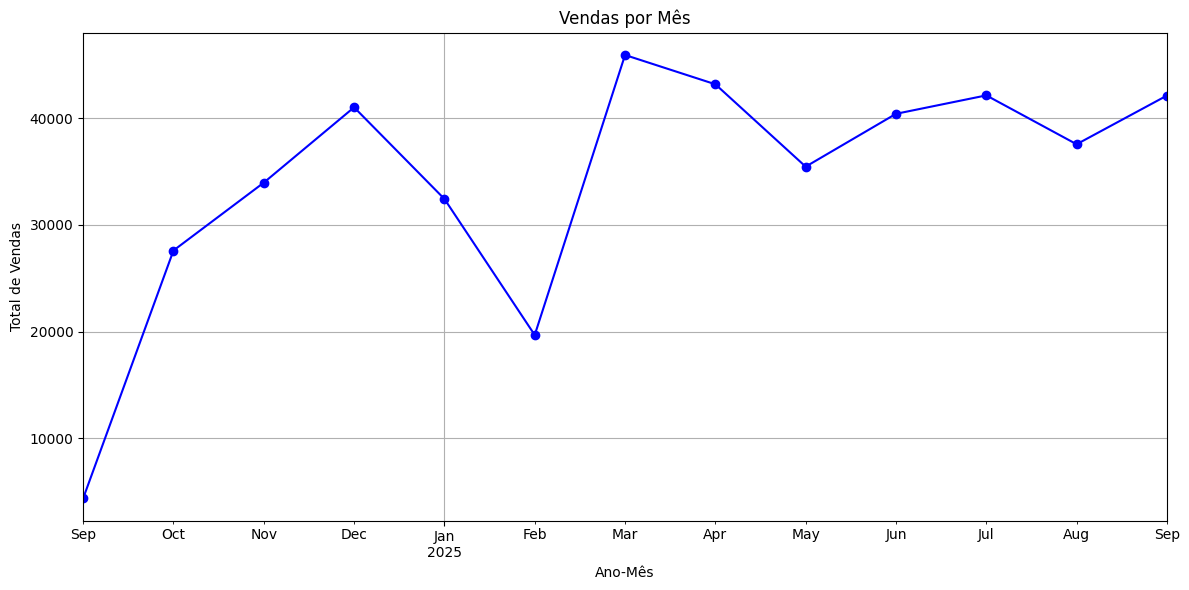

In [75]:
plt.figure(figsize=(12, 6))
vendas_por_mes.plot(kind='line', marker='o', color='blue')
plt.title('Vendas por Mês') #título do grafico
plt.xlabel('Ano-Mês') #eixo x
plt.ylabel('Total de Vendas') #eixo y
plt.grid(True) # Traça as linhas no gráfico , o que ajuda na visualização
plt.tight_layout()
plt.show()